# **Import Libraries and modules**

In [1]:
# Importing keras
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
# Importing required libraries

import numpy as np

from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [3]:
# Getting the training and test sets from the MNIST dataset available in the datasets module of keras library. The dataset consists of images of digits and their respective labels. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


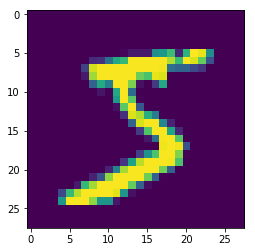

In [4]:
print (X_train.shape) # printing the dimensions of image in the training dataset
from matplotlib import pyplot as plt # Importing matplotlib.pyplot for plotting data
%matplotlib inline # Allows plots to be displayed in notebook mode
plt.imshow(X_train[0]) # Printing the first image in the training dataset

In [0]:
'''Reshaping each image in the training and test sets to have 1 as the third dimension, for the images are grayscale. The third dimesion marks the number of channels, which varies 
along the convolution pipeline and therefore, the input images need to mention the channel dimension as 1 explicitly. '''

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
'''Standardizing the train and test set images by min-max normalization. The minimum and maximum pixel values for grayscale images are 0 and 255 respectively. The pixel values are first 
converted to float, since dividing by 255 would result in all pixel values being zero (integer divided by integer results in an integer, according to type casting rules.

Normalization makes the model suited to accept all ranges of pixel values as inputs for the inputs (be it the test or train dataset) would only have pixel values between 0 and 1. If the
input is not normalized, the model would always expect images with pixel values in the range 0 to 255 (in this case, the MNIST dataset has 8 bit images)'''

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
# The first 10 entries of the training set labels, which only has the class for respective images.
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices, with 1-hot encoding for each class.
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
# Now the first 10 entries of the training set labels consists of the 1-hot encoded values for each class, i.e. 1 for the correct class and 0 elsewhere.
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

model.add(BatchNormalization(input_shape=(28,28,1))) 
model.add(Convolution2D(16, 3, activation='relu', use_bias=False)) # Output=26x26x16, RF = 3x3

model.add(BatchNormalization())
model.add(Convolution2D(32, 3, activation='relu', use_bias=False)) # Output=24x24x32, RF = 5x5
model.add(Dropout(0.4))

model.add(BatchNormalization())
model.add(Convolution2D(16, 1, activation='relu', use_bias=False)) # Output=24x24x16, RF = 5x5

model.add(MaxPooling2D(pool_size=(2,2))) # Output=12x12x16, RF = 10x10

model.add(BatchNormalization())
model.add(Convolution2D(16, 3, activation='relu', use_bias=False)) # Output=10x10x16, RF = 12x12

model.add(BatchNormalization())
model.add(Convolution2D(32, 3, activation='relu', use_bias=False)) # Output=8x8x32, RF = 14x14
model.add(Dropout(0.4))

model.add(BatchNormalization())
model.add(Convolution2D(10, 1, activation='relu', use_bias=False)) # Output=8x8x10, RF = 14x14

model.add(MaxPooling2D(pool_size=(2,2))) # Output=4x4x10, RF = 28x28

model.add(Convolution2D(10, 4, use_bias=False)) # Output=1x1x10, RF = 28x28
model.add(Flatten())
model.add(Activation('softmax'))

In [56]:
# 14,548 total parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_82 (Batc (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 26, 26, 16)        144       
_________________________________________________________________
batch_normalization_83 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_97 (Conv2D)           (None, 24, 24, 32)        4608      
_________________________________________________________________
dropout_7 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_84 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_98 (Conv2D)           (None, 24, 24, 16)        512       
__________

In [0]:
'''Compiling the model with the categorical cross entropy as the loss function (used for classification problems), ADAM optimizer for minimizing the loss and "accuracy" as the metric for 
measuring model correctness.''' 

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [58]:
'''Running the model with X_train and Y_train as feature and label for classification, batch size as 32, number of epochs as 10 (the number of times model goes through each training image)
and verbose=1 for printing the logs.'''

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 23s 380us/step - loss: 0.2377 - acc: 0.9247 - val_loss: 0.1350 - val_acc: 0.9559
Epoch 2/10
60000/60000 [==============================] - 21s 342us/step - loss: 0.0790 - acc: 0.9751 - val_loss: 0.0553 - val_acc: 0.9824
Epoch 3/10
60000/60000 [==============================] - 21s 343us/step - loss: 0.0639 - acc: 0.9805 - val_loss: 0.0494 - val_acc: 0.9856
Epoch 4/10
60000/60000 [==============================] - 20s 334us/step - loss: 0.0546 - acc: 0.9828 - val_loss: 0.0535 - val_acc: 0.9822
Epoch 5/10
60000/60000 [==============================] - 20s 334us/step - loss: 0.0486 - acc: 0.9847 - val_loss: 0.0395 - val_acc: 0.9877
Epoch 6/10
60000/60000 [==============================] - 21s 345us/step - loss: 0.0426 - acc: 0.9864 - val_loss: 0.0364 - val_acc: 0.9889
Epoch 7/10
60000/60000 [==============================] - 21s 342us/step - loss: 0.0400 - acc: 0.9870 - val_loss: 0.

In [59]:
# Evaluating the model on the test set for getting model correctness.

model.fit(X_train, Y_train, batch_size=64, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
  576/60000 [..............................] - ETA: 18s - loss: 0.0231 - acc: 0.9913

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 12s 199us/step - loss: 0.0260 - acc: 0.9917 - val_loss: 0.0245 - val_acc: 0.9924
Epoch 2/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0258 - acc: 0.9918 - val_loss: 0.0292 - val_acc: 0.9911
Epoch 3/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0255 - acc: 0.9919 - val_loss: 0.0285 - val_acc: 0.9906
Epoch 4/10
60000/60000 [==============================] - 10s 171us/step - loss: 0.0254 - acc: 0.9917 - val_loss: 0.0276 - val_acc: 0.9915
Epoch 5/10
60000/60000 [==============================] - 11s 187us/step - loss: 0.0245 - acc: 0.9921 - val_loss: 0.0227 - val_acc: 0.9926
Epoch 6/10
60000/60000 [==============================] - 10s 174us/step - loss: 0.0236 - acc: 0.9920 - val_loss: 0.0234 - val_acc: 0.9914
Epoch 7/10
60000/60000 [==============================] - 10s 172us/step - loss: 0.0233 - acc: 0.9930 - val_loss: 0.0282 - val_acc: 0.9900
Epoch 8/10
60000/60000 [==============

In [60]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
  512/60000 [..............................] - ETA: 21s - loss: 0.0248 - acc: 0.9883

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 20s 332us/step - loss: 0.0275 - acc: 0.9911 - val_loss: 0.0225 - val_acc: 0.9926
Epoch 2/10
60000/60000 [==============================] - 20s 334us/step - loss: 0.0257 - acc: 0.9916 - val_loss: 0.0312 - val_acc: 0.9906
Epoch 3/10
60000/60000 [==============================] - 21s 354us/step - loss: 0.0249 - acc: 0.9920 - val_loss: 0.0258 - val_acc: 0.9922
Epoch 4/10
60000/60000 [==============================] - 20s 334us/step - loss: 0.0246 - acc: 0.9921 - val_loss: 0.0218 - val_acc: 0.9926
Epoch 5/10
60000/60000 [==============================] - 21s 346us/step - loss: 0.0227 - acc: 0.9923 - val_loss: 0.0231 - val_acc: 0.9929
Epoch 6/10
60000/60000 [==============================] - 20s 333us/step - loss: 0.0237 - acc: 0.9921 - val_loss: 0.0219 - val_acc: 0.9930
Epoch 7/10
60000/60000 [==============================] - 21s 353us/step - loss: 0.0220 - acc: 0.9932 - val_loss: 0.0200 - val_acc: 0.9931
Epoch 8/10
60000/60000 [==============

In [61]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
  480/60000 [..............................] - ETA: 23s - loss: 0.0293 - acc: 0.9875

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 20s 335us/step - loss: 0.0221 - acc: 0.9929 - val_loss: 0.0220 - val_acc: 0.9916
Epoch 2/10
60000/60000 [==============================] - 20s 333us/step - loss: 0.0193 - acc: 0.9936 - val_loss: 0.0193 - val_acc: 0.9936
Epoch 3/10
60000/60000 [==============================] - 20s 334us/step - loss: 0.0205 - acc: 0.9933 - val_loss: 0.0205 - val_acc: 0.9937
Epoch 4/10
60000/60000 [==============================] - 21s 346us/step - loss: 0.0211 - acc: 0.9928 - val_loss: 0.0221 - val_acc: 0.9933
Epoch 5/10
60000/60000 [==============================] - 19s 325us/step - loss: 0.0200 - acc: 0.9933 - val_loss: 0.0188 - val_acc: 0.9936
Epoch 6/10
60000/60000 [==============================] - 20s 325us/step - loss: 0.0210 - acc: 0.9929 - val_loss: 0.0216 - val_acc: 0.9928
Epoch 7/10
60000/60000 [==============================] - 19s 324us/step - loss: 0.0197 - acc: 0.9934 - val_loss: 0.0190 - val_acc: 0.9938
Epoch 8/10
60000/60000 [==============

In [64]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
  512/60000 [..............................] - ETA: 21s - loss: 0.0064 - acc: 1.0000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 19s 323us/step - loss: 0.0181 - acc: 0.9944 - val_loss: 0.0223 - val_acc: 0.9929
Epoch 2/10
60000/60000 [==============================] - 19s 324us/step - loss: 0.0194 - acc: 0.9935 - val_loss: 0.0191 - val_acc: 0.9939
Epoch 3/10
60000/60000 [==============================] - 21s 346us/step - loss: 0.0177 - acc: 0.9940 - val_loss: 0.0218 - val_acc: 0.9932
Epoch 4/10
60000/60000 [==============================] - 20s 325us/step - loss: 0.0178 - acc: 0.9944 - val_loss: 0.0249 - val_acc: 0.9916
Epoch 5/10
60000/60000 [==============================] - 20s 325us/step - loss: 0.0173 - acc: 0.9940 - val_loss: 0.0293 - val_acc: 0.9898
Epoch 6/10
60000/60000 [==============================] - 19s 324us/step - loss: 0.0167 - acc: 0.9945 - val_loss: 0.0208 - val_acc: 0.9941
Epoch 7/10
17024/60000 [=======>......................] - ETA: 13s - loss: 0.0185 - acc: 0.9942

KeyboardInterrupt: ignored

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [66]:
print(score)

[0.018470604710874614, 0.9947]


In [0]:
y_pred = model.predict(X_test)

In [68]:
print(y_pred[:9])
print(y_test[:9])

[[7.2039232e-12 9.3590136e-10 1.4608558e-07 3.4334438e-08 4.8077275e-11
  1.4920208e-10 4.1574227e-16 9.9999964e-01 4.8544333e-12 1.3142569e-07]
 [1.3109469e-06 2.9376324e-06 9.9999511e-01 2.2755945e-08 6.2481263e-08
  3.2164725e-13 2.7964997e-08 2.9951704e-07 2.0880090e-07 3.1779235e-11]
 [2.2908191e-06 9.9984729e-01 6.6366379e-06 3.6481893e-08 9.4566807e-05
  3.2635892e-06 1.9942723e-05 1.7713675e-05 7.4270838e-06 7.5985253e-07]
 [9.9996448e-01 5.1290128e-15 3.7166995e-08 4.7988119e-10 2.9971987e-11
  9.2050758e-09 3.2492928e-05 6.6283659e-11 2.7371666e-06 2.4597617e-07]
 [1.1693954e-08 2.5254858e-09 2.1593706e-10 3.7289432e-11 9.9997401e-01
  1.1156332e-10 1.2163356e-09 7.2995404e-10 7.3909767e-08 2.5936766e-05]
 [2.1799229e-07 9.9955767e-01 1.7690675e-06 5.2143783e-09 1.2122360e-04
  2.2962288e-08 1.4819972e-06 3.1212068e-04 3.7226785e-06 1.7277591e-06]
 [3.5006364e-15 3.1116806e-06 6.7385003e-10 3.8583503e-13 9.9999607e-01
  2.1367447e-10 3.8418619e-14 7.6133482e-08 1.2610972e-09 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [70]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored